In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()


# Intro to Classification Methods: 
- Logistic Regression
- Decision Trees
- KNN
- Random Forest
 

<img src="./images/border.jpg" height="10" width="1500" align="center"/>

<a id="learning-objectives"></a>
### Learning Objectives
- Review linear regression in scikit-learn.
- Understand the difference between Regression and Classification
- Explain how logistic regression works.
- Use logistic regression with categorical features.
- Utilize different metrics for evaluating classifier models.
- Implement scikit-learn's KNN, Decision Trees, and Random Forest Models
- Optimize KNN models
- Standardize Features
- Construct a confusion matrix based on predicted classes.

<img src="./images/border.jpg" height="10" width="1500" align="center"/>

<a id="refresher-fitting-and-visualizing-a-linear-regression-using-scikit-learn"></a>
## Refresher: Fitting and Visualizing a Linear Regression Using scikit-learn
---

Use Pandas to load in the glass attribute data from the UCI machine learning website. The columns are different measurements of properties of glass that can be used to identify the glass type. For detailed information on the columns in this data set: http://archive.ics.uci.edu/ml/datasets/glass+identification

In [52]:
# Glass identification data set
import pandas as pd
from sklearn import linear_model, model_selection, metrics

import warnings
warnings.filterwarnings('ignore')

In [54]:
glass = pd.read_csv('data/glass.csv')

In [58]:
# change columns to something more uniform
glass.columns = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass.head(20)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


**Data Dictionary**

- `Id`: number: 1 to 214
- `RI`: refractive index  
- `Na`: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- `Mg`: Magnesium
- `Al`: Aluminum
- `Si`: Silicon
- `K` : Potassium
- `Ca`: Calcium
- `Ba`: Barium
- `Fe`: Iron
- `Type` : Type of glass:

<Axes: xlabel='glass_type'>

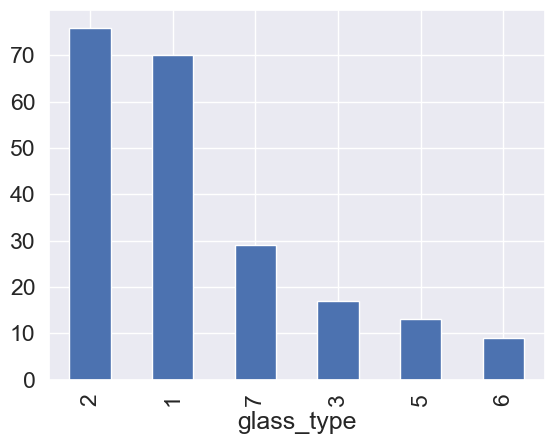

In [65]:
glass.glass_type.value_counts().plot.bar()

In [82]:
glass.glass_type.value_counts()

glass_type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [83]:
29+17+13+9

68

**Pretend we want to predict `ri`, and our only feature is `al`. How could we do it using machine learning?**

<!--
**Answer:** We could frame it as a regression problem, and use a linear regression model with **`al`** as the only feature and **`ri`** as the response.
-->

**How would we visualize this model?**
<!--
**Answer:** Create a scatter plot with **`al`** on the x-axis and **`ri`** on the y-axis, and draw the line of best fit.
-->

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5);

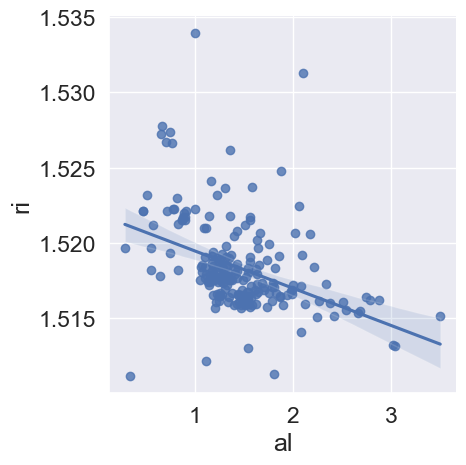

In [67]:
#scatter with regression line
sns.lmplot(x='al', y='ri', data=glass);

**How can we draw this plot (just the points — don't worry about the regression line) without using Seaborn?**

Text(24.499999999999986, 0.5, 'ri')

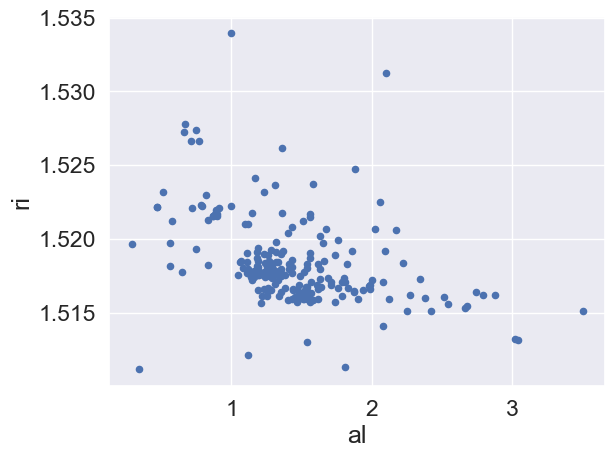

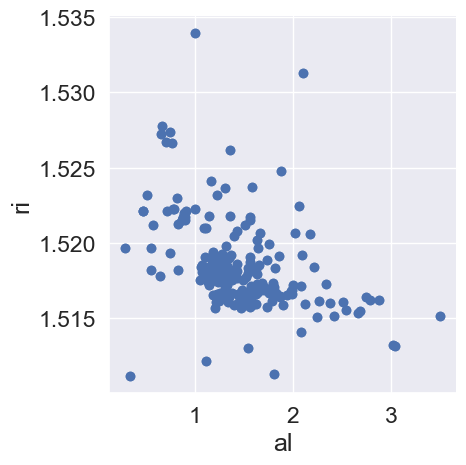

In [68]:
# Scatter plot using Pandas
glass.plot(kind='scatter', x='al', y='ri')

# Seaborn with parameters
sns.lmplot(x='al', y='ri', data=glass, fit_reg=False);

# Equivalent scatter plot using Matplotlib
plt.scatter(glass.al, glass.ri)
plt.xlabel('al')
plt.ylabel('ri')

To build a linear regression model to predict `ri` using scikit-learn, we will need to Import `LinearRegression` from `linear_model`.

**Using `LinearRegression`, fit a model predicting `ri` from `al` (and an intercept).**

In [69]:
# Fit a linear regression model (name the model "linreg").
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri

linreg.fit(X,y)


LinearRegression()

In [70]:
X.head()

,al
0,1.10
1,1.36
2,1.54
3,1.29
4,1.24


In [11]:
y.head()

0    1.52101
1    1.51761
2    1.51618
3    1.51766
4    1.51742
Name: ri, dtype: float64

**Using the `LinearRegression` object we have fit, create a variable that are our predictions for `ri` for each row's `al` in the data set.**

In [71]:
# Make predictions for all values of X and add back to the original DataFrame.
y_pred = linreg.predict(X)

# new column of y_pred
glass['y_pred'] = y_pred

In [13]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873


**Plot the predicted `ri` against each `al` as a line.**

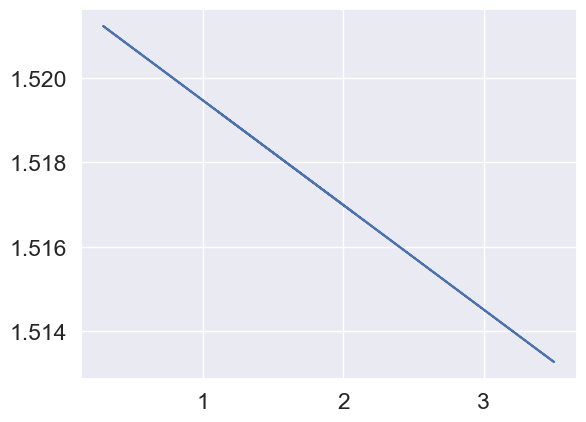

In [72]:
# Plot those predictions connected by a line (try plt.plot()).
plt.plot(glass.al, glass.y_pred)


_Note the y axis labels when comparing to seaborns plot_

**Plot this regression line with the scatter points on the same chart.**

Text(0, 0.5, 'ri')

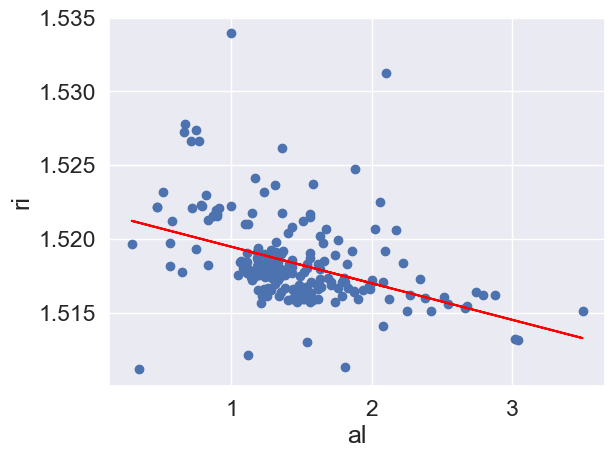

In [73]:
# Put the plots together (use a scatter and line graph).
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.y_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri')

<img src="./images/border.jpg" height="10" width="1500" align="center"/>

<a id="refresher-interpreting-linear-regression-coefficients"></a>
## Refresher: Interpreting Linear Regression Coefficients
---

Recall the simple linear regression equation is $y = \beta_0 + \beta_1x$

$\beta_0$ is the intercept and $\beta_1$ is, in this case, our coefficient on the `al` predictor.

**Print out the intercept and coefficient values from our fit `LinearRegression` object.**

In [16]:
print(linreg.intercept_)
print(linreg.coef_)

1.5219453302386425
[-0.00247761]


**Manually compute the predicted value of `ri` when `al=2.0` using the regression equation.**

In [74]:
# Compute prediction for al=2 using the equation.
linreg.intercept_ + linreg.coef_[0] * 2

1.5169901174637033

**Confirm that this is the same value we would get when using the built-in `.predict()` method of the `LinearRegression` object.**

In [75]:
# Compute prediction for al=2 using the predict method.
OO=linreg.predict([[2]])

In [76]:
OO[0]

1.5169901174637033

What do these coefficents mean? 

**Coefficient interpretation:** A 1-unit increase in `al` is associated with a ~0.0025-unit decrease in `ri`.

**Intercept interpretation:** When `al = 0`, the estimated value of `ri` is 1.52194533024.

<img src="./images/border.jpg" height="10" width="1500" align="center"/>

<a id="predicting-a-categorical-response"></a>
## Predicting a Single Categorical Response
---

Linear regression is appropriate when we want to predict the value of a continuous target/response variable, but what about when we want to predict membership in a class or category?

**Examine the glass type column in the data set. What are the counts in each category?**

In [77]:
# Examine glass_type.
glass.glass_type.value_counts().sort_index()

glass_type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

Say these types are subdivisions of broader glass types:

> **Window glass:** types 1, 2, and 3

> **Household glass:** types 5, 6, and 7

**Create a new `household` column that indicates whether or not a row is household glass, coded as 1 or 0, respectively.**

In [79]:
# Types 1, 2, 3 are window glass.
# Types 5, 6, 7 are household glass.
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0


In [80]:
glass.household.unique()

array([0, 1])

In [81]:
glass.household.value_counts()

household
0    163
1     51
Name: count, dtype: int64

In [85]:
glass['household_text'] = glass.glass_type.map({1:'window', 2:'window', 3:'window', 5:'household', 6:'household', 7:'household'})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_text
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0,window
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0,window
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0,window
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0,window
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0,window


Let's change our task, so that we're predicting the `household` category using `al`. Let's visualize the relationship to figure out how to do this.

**Make a scatter plot comparing `al` and `household`.**

Text(0, 0.5, 'household')

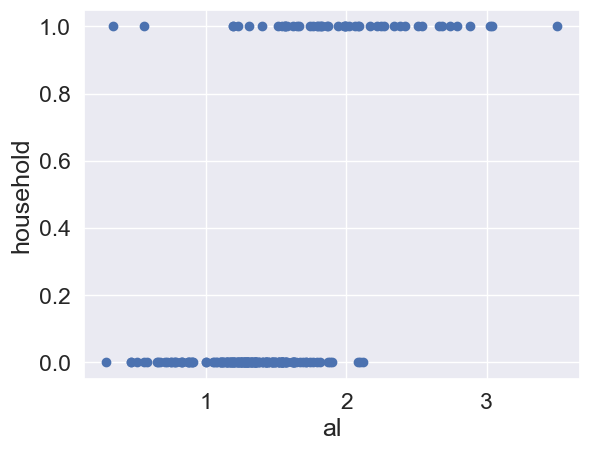

In [86]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

**Fit a new `LinearRegression` predicting `household` from `al`.**

Let's draw a regression line like we did before:

In [87]:
# Fit a linear regression model and store the predictions.
feature_cols = ['al']
X = glass[feature_cols] 
y = glass.household 
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X) # prediction via Lin Reg

Text(0, 0.5, 'household')

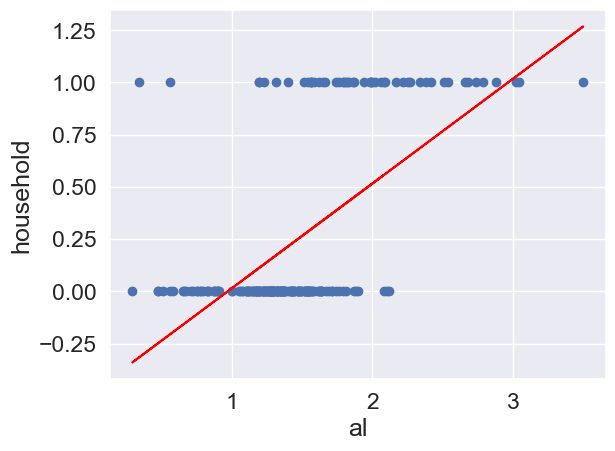

In [88]:
# Scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

If **al=3**, what class do we predict for household? **1**

If **al=1.5**, what class do we predict for household? **0**

We predict the 0 class for **lower** values of al, and the 1 class for **higher** values of al. What's our cutoff value? Around **al=2**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if **household_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

**Using this threshold, create a new column of our predictions for whether a row is household glass.**

In [89]:
# Understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and the second value if the condition is False.
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], dtype='<U5')

In [90]:
# Transform household_pred to 1 or 0.
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_text,household_pred,household_pred_class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0,window,0.065459,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0,window,0.195765,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0,window,0.285976,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0,window,0.160682,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0,window,0.135623,0


**Plot a line that shows our predictions for class membership in household vs. not.**

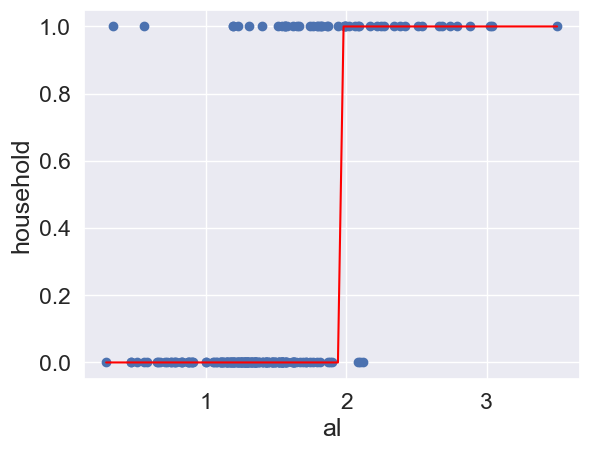

In [91]:
# sort so we can have a continuous line
glass.sort_values('al', inplace=True)
# Plot the class predictions.
plt.scatter(glass.al, glass.household)

plt.xlabel('al')
plt.ylabel('household')

plt.plot(glass.al, glass.household_pred_class, color='red')

<img src="./images/border.jpg" height="10" width="1500" align="center"/>

<a id="using-logistic-regression-for-classification"></a>
## Using Logistic Regression for Classification
---

Logistic regression is a more appropriate method for what we just did with a linear regression. The values output from a linear regression cannot be interpreted as probabilities of class membership since their values can be greater than 1 and less than 0. Logistic regression, on the other hand, ensures that the values output as predictions can be interpreted as probabilities of class membership.

**Import the `LogisticRegression` class from `linear_model` below and fit the same regression model predicting `household` from `al`.**

In [127]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

logreg.fit(X,y)
pred = logreg.predict(X)


**Plot the predicted class using the logistic regression as we did for the linear regression predictions above.**

As you can see, the class predictions are the same.

Text(0, 0.5, 'household')

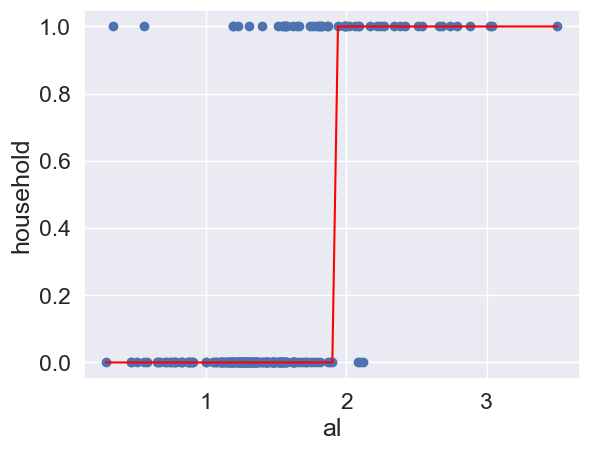

In [111]:
# Plot the class predictions.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

What if we wanted the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction?

**Using the built-in `.predict_proba()` function, examine the predicted probabilities for the first handful of rows of `X`.**

In [112]:
X.head()

,al
21,0.29
184,0.34
39,0.47
38,0.47
50,0.51


In [113]:
logreg.predict_proba(X)[0:5]

array([[0.9939759 , 0.0060241 ],
       [0.99296771, 0.00703229],
       [0.98949363, 0.01050637],
       [0.98949363, 0.01050637],
       [0.98811597, 0.01188403]])

Sklearn orders the columns according to our class labels. The two-column output of `predict_proba` returns a column for each class of our `household` variable. The first column is the probability of `household=0` for a given row, and the second column is the probability of `household=1`.

**Store the predicted probabilities of class=1 in its own column in the data set.**

In [114]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [97]:
glass.tail(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_text,household_pred,household_pred_class
199,1.51609,15.01,0.00,2.51,73.05,0.05,8.83,0.53,0.00,7,1.515727,1,household,0.772118,1
196,1.51556,13.87,0.00,2.54,73.23,0.14,9.41,0.81,0.01,7,1.515652,1,household,0.787153,1
198,1.51531,14.38,0.00,2.66,73.10,0.04,9.08,0.64,0.00,7,1.515355,1,household,0.847295,1
195,1.51545,14.14,0.00,2.68,73.39,0.08,9.07,0.61,0.05,7,1.515305,1,household,0.857318,1
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7,1.515157,1,household,0.887389,1
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1.515033,1,household,0.912448,1
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1.514810,1,household,0.957554,1
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1.514463,1,household,1.027718,1
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1.514413,1,household,1.037742,1
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5,1.513274,1,household,1.268283,1


**Plot the predicted probabilities as a line on our plot (probability of `household=1` as `al` changes).**

Text(0, 0.5, 'household')

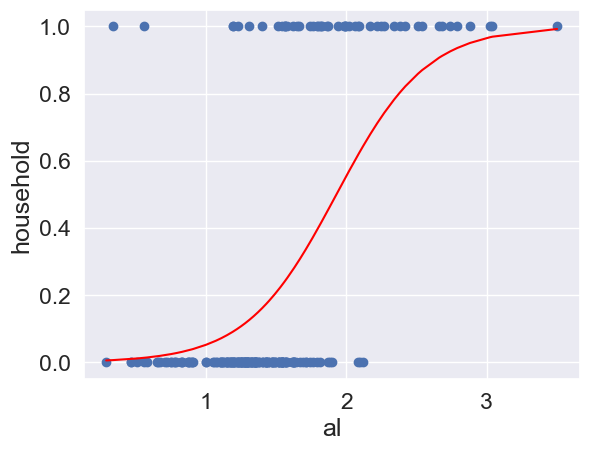

In [115]:
# Plot the predicted probabilities.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [116]:
# Examine some example predictions.
print(logreg.predict_proba([[1]]))
print(logreg.predict_proba([[2]]))
print(logreg.predict_proba([[3]]))

[[0.94755733 0.05244267]]
[[0.4449707 0.5550293]]
[[0.03435025 0.96564975]]


In [117]:
print(logreg.predict_proba([[2.5]]))

[[0.14447583 0.85552417]]


In [118]:
logreg.predict([[3]])

array([1])

<img src="./images/border.jpg" height="10" width="1500" align="center"/>

### Hands on Excercise
<img src="./images/hands_on.jpg" width="100" height="100" align="right"/>

- Select 2 different features
- y will remain the same `glass.household`
- Evaluate the model with `model.score` on the testing data.

In [119]:
glass.columns

Index(['ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe', 'glass_type',
       'y_pred', 'household', 'household_text', 'household_pred',
       'household_pred_class', 'household_pred_prob'],
      dtype='object')

In [120]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
X = glass[['na','fe','al']]
y = glass.household

# test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=99)
#99th state of randomness. if you change it it will change the performance

# logistic regression model fit
LR.fit(X_train,y_train)

# do prediction on test Data
y_pred=LR.predict(X_test)
print(y_pred)

# Calculate score
LR.score(X_test,y_test)

[0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0]


0.9069767441860465

In [ ]:
logreg.predict_proba(X)[:, 1]

In [121]:
LR.predict_proba([[2,4,2]])

array([[9.99999851e-01, 1.49226130e-07]])

<img src="./images/border.jpg" height="10" width="1500" align="center"/>

In [122]:
# Exponential function: e^1
e = np.exp(1)
e

2.718281828459045

What is a (natural) log? It gives you the time needed to reach a certain level of growth:

In [123]:
# Time needed to grow 1 unit to 2.718 units
# ln e = 1
np.log(2.718281828459) # very close to previous value

0.9999999999999832

In [46]:
np.log(e)

1.0

It is also the inverse of the exponential function:

In [47]:
# e^5
np.exp(5)

148.4131591025766

In [48]:
# np.exp(5)
2.7182818**5

148.41315133352072

In [49]:
# Taking the log of the exponential returns back to original input
np.log(np.exp(5))

5.0

Lets take one of our odds from out table and walk through how it works.

In [50]:
# Odds = 0.25
# ln 0.25 = -1.38629436
np.log(0.25)

-1.3862943611198906

In [51]:
print(e**-1.3862943611198906)
print(np.exp(-1.3862943611198906))

0.25000000000000006
0.25


<img src="./images/log_vs_ols.jpg" width="700" height="700" align="Center"/>

<img src="./images/border.jpg" height="10" width="1500" align="center"/>

<a id="what-is-logistic-regression"></a>
## What Is Logistic Regression?
---

Linear regression: Continuous response is modeled as a linear combination of the features.

$$y = \beta_0 + \beta_1x$$

Logistic regression: Log odds of a categorical response being "true" (1) is modeled as a linear combination of the features.

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the logit function.

Probability is sometimes written as pi.

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the logistic function.

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the probabilities of a specific class.
- Those probabilities can be converted into class predictions.

The logistic function has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

We have covered how this works for binary classification problems (two response classes). But what about multi-class classification problems (more than two response classes)?

- The most common solution for classification models is "one-vs-all" (also known as "one-vs-rest"): Decompose the problem into multiple binary classification problems.
- Multinomial logistic regression, on the other hand, can solve this as a single problem, but how this works is beyond the scope of this lesson.

<img src="./images/border.jpg" height="10" width="1500" align="center"/>

<a id="interpreting-logistic-regression-coefficients"></a>
## Interpreting Logistic Regression Coefficients

---

Logistic regression coefficients are not as immediately interpretable as the coefficients from a linear regression. To interpret the coefficients we need to remember how the formulation for logistic regression differs from linear regression.

**First let's plot our logistic regression predicted probability line again.**

In [128]:
glass

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_text,household_pred,household_pred_class,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,1.521227,0,window,-0.340495,0,0.056530
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1.521103,1,household,-0.315436,0,0.625128
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,1.520781,0,window,-0.250283,0,0.045527
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,1.520781,0,window,-0.250283,0,0.045527
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,1.520682,0,window,-0.230236,0,0.026447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1.515033,1,household,0.912448,1,0.943499
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1.514810,1,household,0.957554,1,0.952892
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1.514463,1,household,1.027718,1,0.877212
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1.514413,1,household,1.037742,1,0.885109


In [129]:
logreg = LogisticRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

logreg.fit(X,y)
pred = logreg.predict(X)

# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

Text(0, 0.5, 'household')

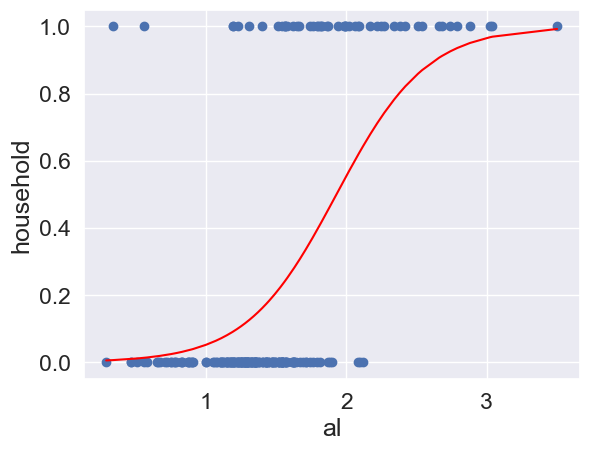

In [131]:
# Plot the predicted probabilities again.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

Remember:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

That means we'll get out the log odds if we compute the intercept plus the coefficient times a value for `al`.

**Compute the log odds of `household` when `al=2`.**

In [132]:
logreg.intercept_

array([-6.00934605])

In [133]:
logreg.coef_

array([[3.11517927]])

In [135]:
# Compute predicted log odds for al=2 using the equation.
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([0.22101248])

Now that we have the log odds, we will need to go through the process of converting these log odds to probability.

**Convert the log odds to odds, then the odds to probability.**

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In [136]:
# Convert log odds to odds.
odds = np.exp(logodds)
odds

array([1.247339])

In [137]:
# Convert odds to probability.
prob = odds/(1 + odds)
prob

array([0.5550293])

This finally gives us the predicted probability of `household=1` when `al=2`. You can confirm this is the same as the value you would get out of the `.predict_proba()` method of the sklearn object.

In [138]:
# Compute predicted probability for al=2 using the predict_proba method.
logreg.predict_proba([[2]])[:, 1]

array([0.5550293])

In [141]:
# Examine the coefficient for al.
logreg.coef_[0]

array([3.11517927])

In [142]:
# Print the intercept.
logreg.intercept_

array([-6.00934605])

**Interpretation:** A 1-unit increase in `al` is associated with a 3.12-unit increase in the log odds of `household`.

In [143]:
# Increasing al by 1 (so that al=3)
logodds = -6.00934605 + 3.11517927*3
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.9656497455497598

In [144]:
# Compute predicted probability for al=3 using the predict_proba method.
logreg.predict_proba([[3]])[:, 1]

array([0.96564975])

**Bottom line:** Positive coefficients increase the log odds of the response (and thus increase the probability), and negative coefficients decrease the log odds of the response (and thus decrease the probability).

In [145]:
# Examine the intercept.
logreg.intercept_

array([-6.00934605])

**Intercept interpretation:** For an `al` value of 0, the log-odds of `household` is -4.12790736.

In [146]:
# Convert log odds to probability.
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.00244968])

That makes sense from the plot above, because the probability of `household=1` should be very low for such a low `al` value.

![Logistic regression beta values](./images/logistic_betas.png)

Changing the $\beta_0$ value shifts the curve horizontally, whereas changing the $\beta_1$ value changes the slope of the curve.

<img src="./images/border.jpg" height="10" width="1500" align="center"/>

<a id="comparing-logistic-regression-to-other-models"></a>
## Comparing Logistic Regression to Other Models
---

Advantages of logistic regression:

- Highly interpretable (if you remember how).
- Model training and prediction are fast.
- No tuning is required (excluding regularization).
- Features don't need scaling.
- Can perform well with a small number of observations.
- Outputs well-calibrated predicted probabilities.

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log odds of the response.
- Performance is (generally) not competitive with the best supervised learning methods.
- Can't automatically learn feature interactions.
- 

<img src="./images/border.jpg" height="10" width="1500" align="center"/>

# Lets build a Tree to classify

<img src="./images/tree.jpg" width="700" height="700" align="center"/>

7.333333333333333

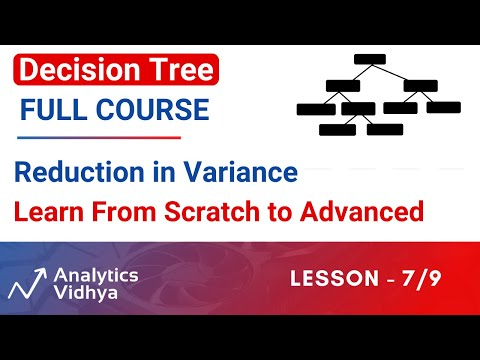

In [195]:
from IPython.display import YouTubeVideo
# Youtube Video
YouTubeVideo('i5wGWV5H7oM')

In [148]:
glass.head(2)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_text,household_pred,household_pred_class,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.0,1,1.521227,0,window,-0.340495,0,0.006024
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.0,6,1.521103,1,household,-0.315436,0,0.007032


In [150]:
X = glass[['na','fe','al','k']]
y = glass.household
X.head()

,na,fe,al,k
21,14.77,0.00,0.29,0.03
184,17.38,0.00,0.34,0.00
39,14.21,0.00,0.47,0.11
38,14.21,0.00,0.47,0.11
50,13.72,0.16,0.51,0.09


In [151]:
y.head()

21     0
184    1
39     0
38     0
50     0
Name: household, dtype: int64

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# for vizualizing the tree
import pydotplus
from IPython.display import Image 
# Create decision tree classifer object
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)
X = glass[['na','fe','al','k']]
y = glass.household
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

# logistic regression model fit
tree_model.fit(X_train,y_train)

# do prediction on test Data
y_pred=tree_model.predict(X_test)
print(y_pred)

# Calculate score
tree_model.score(X_test,y_test)

[0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1]


0.9534883720930233

In [155]:
X.columns.values

array(['na', 'fe', 'al', 'k'], dtype=object)

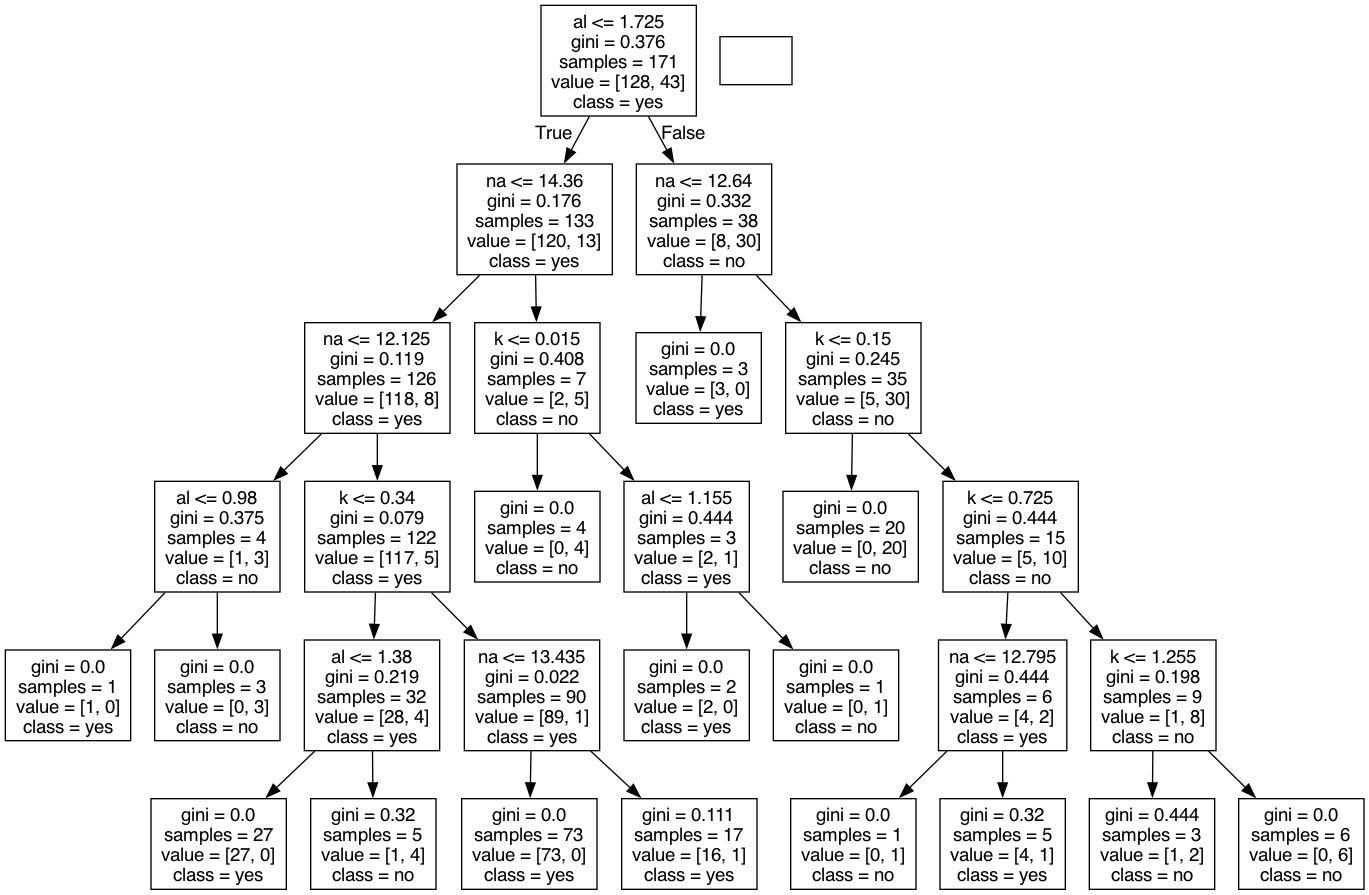

In [164]:
# Create DOT data
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                                feature_names=X.columns.values,  
                                class_names=['yes','no'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

<img src="./images/border.jpg" height="10" width="1500" align="center"/>

<a id="k-nearest-neighbors-knn-classification"></a>
## K-Nearest Neighbors (KNN) Classification
### Tell me about your friends and I tell you who you are!
---

K-nearest neighbors classification is (as its name implies) a classification model that uses the "K" most similar observations in order to make a prediction.

KNN is a supervised learning method; therefore, the training data must have known target values.

The process of of prediction using KNN is fairly straightforward:

1. Pick a value for K.
2. Search for the K observations in the data that are "nearest" to the measurements of the unknown iris.
    - Euclidian distance is often used as the distance metric, but other metrics are allowed.
3. Use the most popular response value from the K "nearest neighbors" as the predicted response value for the unknown iris.

<img src="./images/border.jpg" height="10" width="1500" align="center"/>

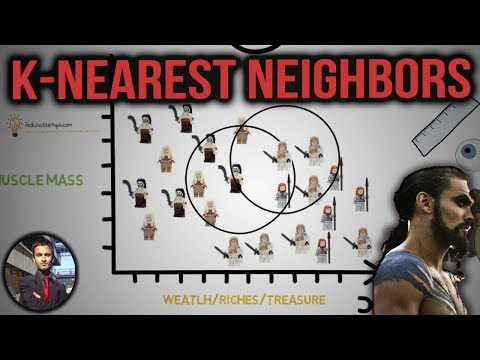

In [202]:
from IPython.display import YouTubeVideo
# Youtube Video
YouTubeVideo('MDniRwXizWo')

The visualizations below show how a given area can change in its prediction as K changes.

- Colored points represent true values and colored areas represent a **prediction space**. (This is called a Voronoi Diagram.)
- Each prediction space is wgere the majority of the "K" nearest points are the color of the space.
- To predict the class of a new point, we guess the class corresponding to the color of the space it lies in.

<img src="./images/border.jpg" height="10" width="1500" align="center"/>

In [165]:
from sklearn.neighbors import KNeighborsClassifier

In [166]:
k=2
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9302325581395349


<img src="./images/border.jpg" height="10" width="1500" align="center"/>

<a id="tuning-a-knn-model"></a>
## Tuning a KNN Model
---

In [170]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 80.

k_range = list(range(1, 80))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [171]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [173]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=True)
df.head()

,training error,testing error
K,,
1,0.000000,0.093023
2,0.058480,0.069767
3,0.076023,0.093023
4,0.081871,0.069767
5,0.081871,0.069767


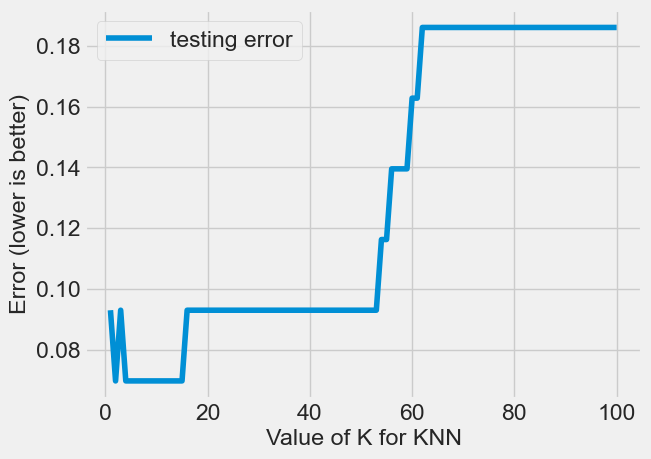

In [208]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [174]:
# Find the minimum testing error and the associated K value.
df.sort_values('testing error').head()

,training error,testing error
K,,
11,0.093567,0.069767
2,0.058480,0.069767
4,0.081871,0.069767
5,0.081871,0.069767
6,0.081871,0.069767


In [175]:
# Alternative method:
min(list(zip(testing_error, k_range)))

(0.06976744186046513, 2)

<a id="training-error-versus-testing-error"></a>
### Training Error Versus Testing Error

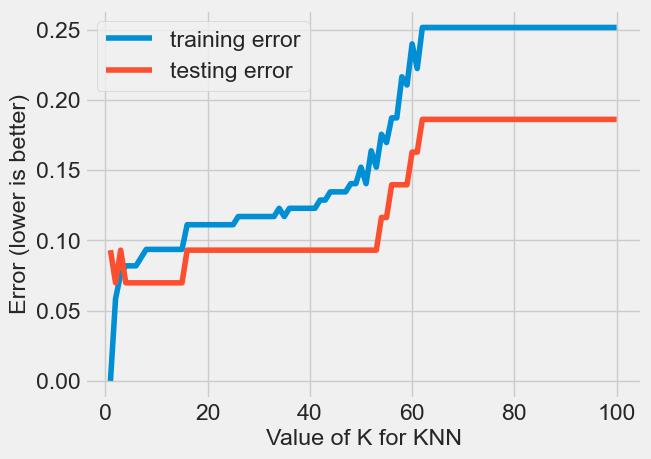

In [211]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

- **Training error** decreases as model complexity increases (lower value of K).
- **Testing error** is minimized at the optimum model complexity.

Evaluating the training and testing error is important. For example:

- If the training error is much lower than the test error, then our model is likely overfitting. 
- If the test error starts increasing as we vary a hyperparameter, we may be overfitting.
- If either error plateaus, our model is likely underfitting (not complex enough).

<img src="./images/border.jpg" height="10" width="1500" align="center"/>

**Advantages of KNN:**

- It's simple to understand and explain.
- Model training is fast.
- It can be used for classification and regression (for regression, take the average value of the K nearest points!).
- Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

**Disadvantages of KNN:**

- It must store all of the training data.
- Its prediction phase can be slow when n is large.
- It is sensitive to irrelevant features.
- It is sensitive to the scale of the data.
- Accuracy is (generally) not competitive with the best supervised learning methods.

<img src="./images/border.jpg" height="10" width="1500" align="center"/>

<a id="standardizing-features"></a>
## Standardizing Features
---

There is one major issue that applies to many machine learning models: They are sensitive to feature scale. 

> KNN in particular is sensitive to feature scale because it (by default) uses the Euclidean distance metric. To determine closeness, Euclidean distance sums the square difference along each axis. So, if one axis has large differences and another has small differences, the former axis will contribute much more to the distance than the latter axis.

This means that it matters whether our feature are centered around zero and have similar variance to each other.

Unfortunately, most data does not naturally start at a mean of zero and a shared variance. Other models tend to struggle with scale as well, even linear regression, when you get into more advanced methods such as regularization.

Fortuantely, this is an easy fix.

<img src="./images/border.jpg" height="10" width="1500" align="center"/>

<a id="use-standardscaler-to-standardize-our-data"></a>
### Use `StandardScaler` to Standardize our Data

StandardScaler standardizes our data by subtracting the mean from each feature and dividing by its standard deviation.

Normalization never hurts!

#### Instantiate and fit `StandardScaler`.

In [248]:
X = glass[['na','fe','al']]
y = glass.household

# test train split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=99)

In [250]:
X.describe()

,na,fe,al
count,214.000000,214.000000,214.000000
mean,13.407850,0.057009,1.444907
std,0.816604,0.097439,0.499270
min,10.730000,0.000000,0.290000
25%,12.907500,0.000000,1.190000
50%,13.300000,0.000000,1.360000
75%,13.825000,0.100000,1.630000
max,17.380000,0.510000,3.500000


In [251]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# We fit to figure out the distribution
scaler.fit(X_train)

# now we transform everything using that
# if you wanted to do it all in one step ==> X_train = scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [259]:
X_train[:,0].std()

1.0

<img src="./images/border.jpg" height="10" width="1500" align="center"/>

#### Fit a KNN model and look at the testing error.
Can you find a number of neighbors that improves our results from before?

In [260]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [261]:
k=min(list(zip(testing_error, k_range)))[1]
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9302325581395349


In [215]:
0.9302325581395349

0.9302325581395349

<img src="./images/border.jpg" height="10" width="1500" align="center"/>

### Cross validation

In [176]:
from sklearn.model_selection import cross_val_score


In [232]:
#X_unscaled = X.copy()
# reset X
X=X_unscaled

In [233]:
k_range = list(range(1, 80))
k_fold_MAD=[]
k_fold_mean=[]
k_fold_std=[]

#######use standard Scaler
scaler.fit(X)
X=scaler.transform(X)
#########
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=True)
df.head()
# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_fold_mean.append(scores.mean())
    k_fold_std.append(scores.std())
    k_fold_MAD.append(scores.mean()/scores.std())
#     print(f'for k = {k}, Mean score is: {scores.mean()} and Standard Deviation is: {scores.std()}')
#     print(f'mean over standard deviation is {scores.mean()/scores.std()}')
                      
column_dict = {'K': k_range, 'mean_accuracy':k_fold_mean, 'std_accuracy':k_fold_std, 'k_fold_MAD':k_fold_MAD}
k_fold_df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=True)                

In [234]:
k_fold_df

,mean_accuracy,std_accuracy,k_fold_MAD
K,,,
1,0.812957,0.090945,8.938995
2,0.869214,0.018218,47.710980
3,0.878295,0.038103,23.050558
4,0.887597,0.041019,21.638466
5,0.887597,0.041019,21.638466
...,...,...,...
75,0.761683,0.009008,84.559893
76,0.761683,0.009008,84.559893
77,0.761683,0.009008,84.559893


In [235]:
# accuracy high, MAD high

In [236]:
max(list(zip(k_fold_MAD, k_range)))

(84.55989270006299, 79)

In [237]:
k_fold_mean[78]

0.7616832779623477

In [238]:
max(list(zip(k_fold_mean, k_range)))

(0.9115171650055369, 8)

In [239]:
k_fold_df.iloc[8:15]

,mean_accuracy,std_accuracy,k_fold_MAD
K,,,
9,0.906755,0.043893,20.658333
10,0.906755,0.043893,20.658333
11,0.906755,0.043893,20.658333
12,0.906755,0.043893,20.658333
13,0.906755,0.043893,20.658333
14,0.892580,0.040405,22.090899
15,0.902104,0.047195,19.114273


<Axes: xlabel='K'>

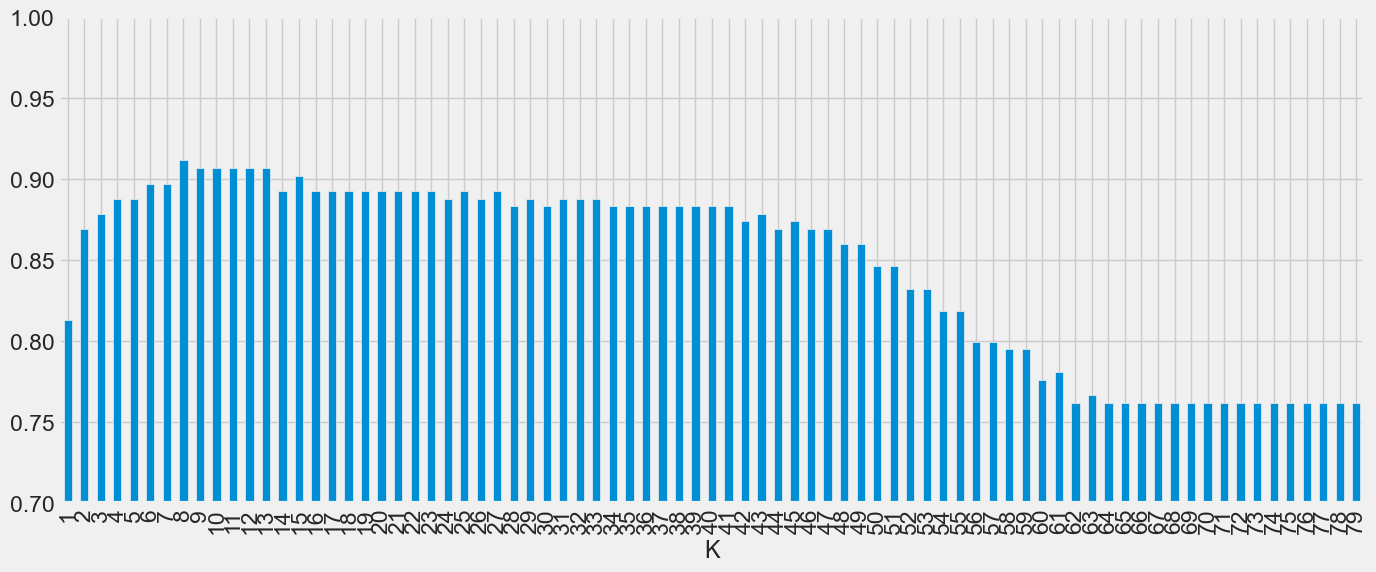

In [240]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.ylim((0.7,1))
k_fold_df.mean_accuracy.plot.bar()

<Axes: xlabel='K'>

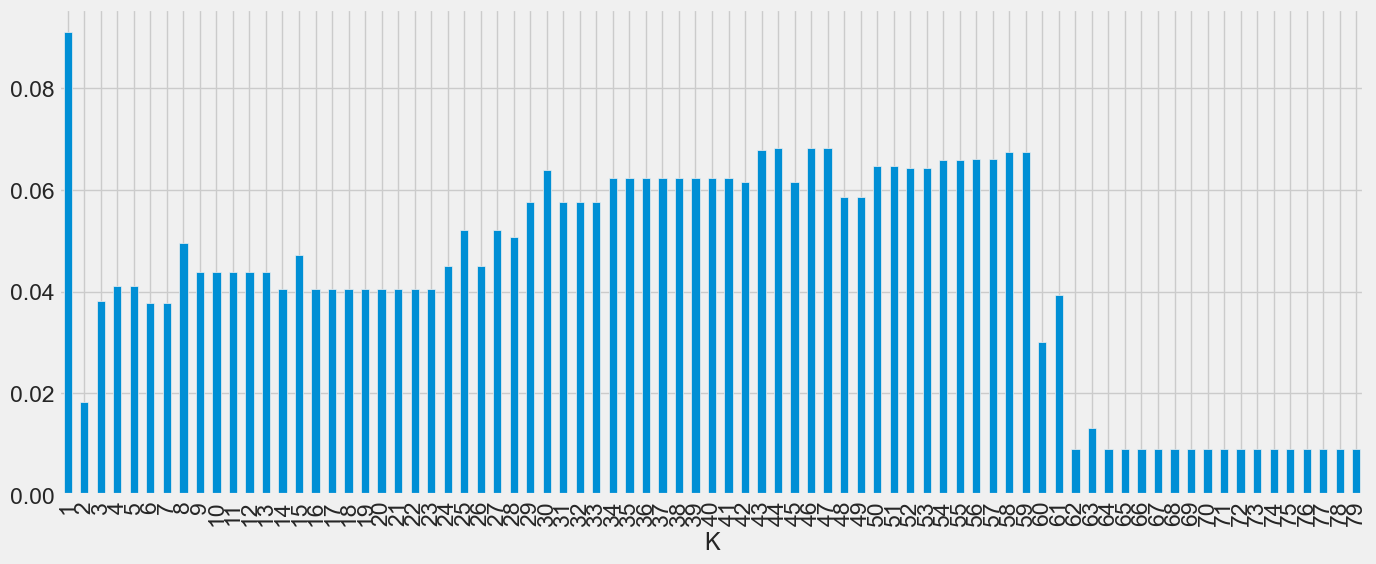

In [241]:
plt.rcParams['figure.figsize'] = (15, 6)
k_fold_df.std_accuracy.plot.bar()

<Axes: xlabel='K'>

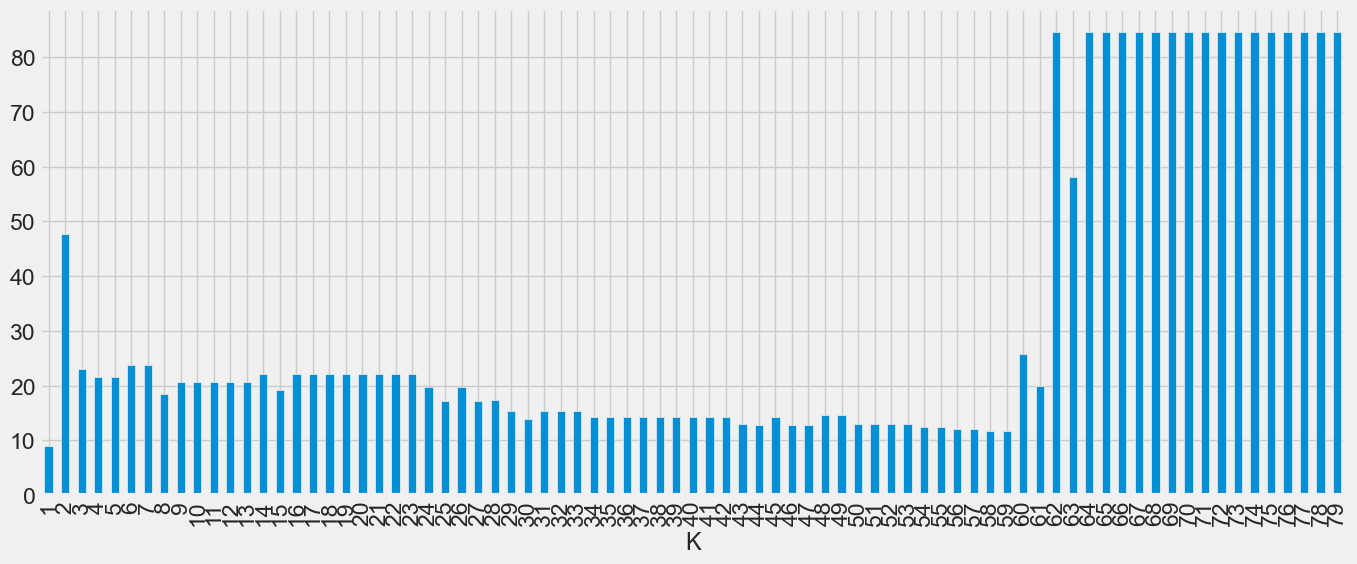

In [242]:
plt.rcParams['figure.figsize'] = (15, 6)
k_fold_df.k_fold_MAD.plot.bar()

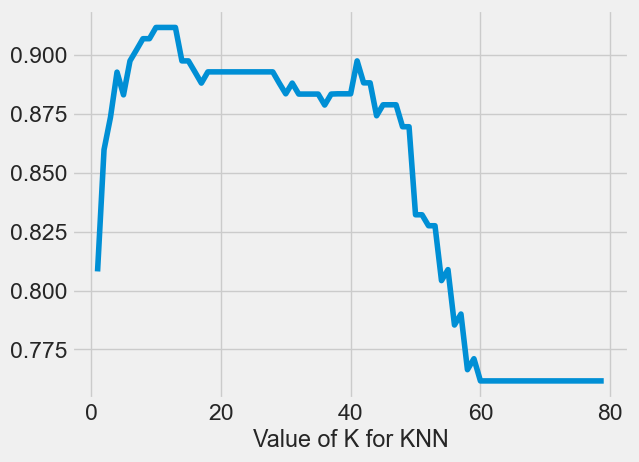

In [204]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
k_fold_df.iloc[:,0].plot();
plt.xlabel('Value of K for KNN');

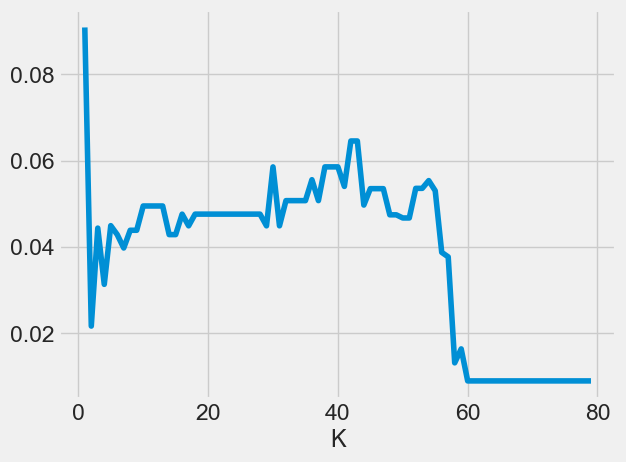

In [205]:
k_fold_df.iloc[:,1].plot();

# Random Forest 
----
Dictatorship or diplomacy?

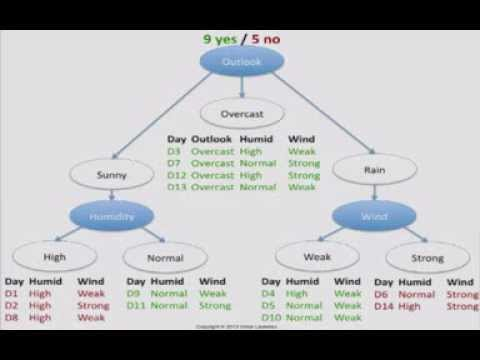

In [216]:
# How Decision Trees work?
from IPython.display import YouTubeVideo

YouTubeVideo('eKD5gxPPeY0')

<img src="./Images/rf.jpg" width="550" height="550" align="center"/>

In [262]:
## Lets import RF
from sklearn.ensemble import RandomForestClassifier

In [264]:
X = glass[['na','fe','al']]
y = glass.household

# test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=99)

In [265]:
# Calculate testing error.
rf_model = RandomForestClassifier(n_estimators=20,max_depth=8)


rf_model.fit(X_train, y_train)

y_pred_class = rf_model.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
print('the accuracy is: ',testing_accuracy)
testing_error = 1 - testing_accuracy

print('the error is: ',testing_error)

the accuracy is:  0.9069767441860465
the error is:  0.09302325581395354


<img src="./images/border.jpg" height="10" width="1500" align="center"/>

## A company claims they have a new cancer detection test with 99% accuracy and cost of $1.
## They have tested it on 1000 people. Do you trust to use it?

----

## Is accuracy is good metric? 
<img src="./images/accuracy.png" width="700" height="700" align="center"/>

### The Accuracy Paradox

Accuracy is a very intuitive metric — it's a lot like an exam score where you get total correct/total attempted. However, accuracy is often a poor metric in application. There are many reasons for this:
- Imbalanced problems problems with 95% positives in the baseline will have 95% accuracy even with no predictive power.
  - This is the paradox; pursuing accuracy often means predicting the most common class rather than doing the most useful work.
- Applications often have uneven penalties and rewards for true positives and false positives.
- Ranking predictions in the correct order be more important than getting them correct.
- In many case we need to know the exact probability of a positives and negatives.
  - To calculate an expected return.
  - To triage observations that are borderline positive.

<a id="advanced-classification-metrics"></a>
## Advanced Classification Metrics

---

When we evaluate the performance of a classifier model, the standard metric to use is accuracy: How many class labels did we guess correctly? However, accuracy is only one of several metrics we could use when evaluating a classification model.

$$Accuracy = \frac{total~predicted~correct}{total~predicted}$$

Accuracy alone doesn’t always give us a full picture.

If we know a model is 75% accurate, it doesn’t provide any insight into why the 25% was wrong.

Consider a binary classification problem where we have 165 observations/rows of people who are either smokers or nonsmokers.

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>

</table>

There are 60 in class 0, nonsmokers, and 105 observations in class 1, smokers
<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>

</table>

We have 55 predictions of class, predicted as nonsmokers, and 110 of class 1, predicted to be smokers.

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

- **True positives (TP):** These are cases in which we predicted yes (smokers), and they actually are smokers.
- **True negatives (TN):** We predicted no, and they are nonsmokers.
- **False positives (FP):** We predicted yes, but they were not actually smokers. (This is also known as a "Type I error.")
- **False negatives (FN):** We predicted no, but they are smokers. (This is also known as a "Type II error.")
<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**Categorize these as TP, TN, FP, or FN:**

Try not to look at the answers above.
    
- We predict nonsmoker, but the person is a smoker.
- We predict nonsmoker, and the person is a nonsmoker.
- We predict smoker and the person is a smoker.
- We predict smoker and the person is a nonsmoker.

<!--ANSWER
- FN
- TN
- TP
- FP
-->

<a id="accuracy-true-positive-rate-and-false-negative-rate"></a>
### Accuracy, True Positive Rate, and False Negative Rate

**Accuracy:** Overall, how often is the classifier correct?

<span>
    (<span style="color: green">TP</span>+<span style="color: red">TN</span>)/<span style="color: blue">total</span> = (<span style="color: green">100</span>+<span style="color: red">50</span>)/<span style="color: blue">165</span> = 0.91
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom; color: blue">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center; background-color: red">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center; background-color: green">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**True positive rate (TPR)** asks, “Out of all of the target class labels, how many were accurately predicted to belong to that class?”

For example, given a medical exam that tests for cancer, how often does it correctly identify patients with cancer?

<span>
<span style="color: green">TP</span>/<span style="color: blue">actual yes</span> = <span style="color: green">100</span>/<span style="color: blue">105</span> = 0.95
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center;background-color: green">TP = 100</td>
    <td style="text-align: center;color: blue">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**False positive rate (FPR)** asks, “Out of all items not belonging to a class label, how many were predicted as belonging to that target class label?”

For example, given a medical exam that tests for cancer, how often does it trigger a “false alarm” by incorrectly saying a patient has cancer?

<span>
<span style="color: orange">FP</span>/<span style="color: blue">actual no</span> = <span style="color: orange">10</span>/<span style="color: blue">60</span> = 0.17
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center;background-color: orange">FP = 10</td>
    <td style="text-align: center;color:blue">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**Can you see that we might weigh TPR AND FPR differently depending on the situation?**

- Give an example when we care about TPR, but not FPR.
- Give an example when we care about FPR, but not TPR.

<!--
ANSWER:
- During an initial medical diagnosis, we want to be sensitive. We want initial screens to come up with a lot of true positives, even if we get a lot of false positives.
- If we are doing spam detection, we want to be precise. Anything that we remove from an inbox must be spam, which may mean accepting fewer true positives.
-->

## The Confusion Matrix
<img src="./images/confusion.png" width="500" height="500" align="center"/>

# What is precison and recall? 
<img src="./images/recall.png" width="700" height="700" align="center"/>

## What is F1 score?
<img src="./images/f1-score.jpeg" width="700" height="350" align="center"/>

## Lets review the Matrix for above example

In [266]:
metrics.confusion_matrix(y_test, y_pred)

array([[35,  0],
       [ 2,  6]])

In [267]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       1.00      0.75      0.86         8

    accuracy                           0.95        43
   macro avg       0.97      0.88      0.91        43
weighted avg       0.96      0.95      0.95        43



---

## Grid Search CV with multiple Models

In [268]:
# Import necessary packages
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

In [269]:
X = glass[['na','fe','al','k']]
y = glass.household
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [270]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

X = glass[['na','fe','al','k']]
y = glass.household
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf6 = MultinomialNB()
clf7 = GradientBoostingClassifier(random_state=42)

param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__max_depth'] = [5,10,25,None]
param4['classifier__min_samples_split'] = [2,5,10]
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_neighbors'] = [2,5,10,25,50]
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__alpha'] = [10**0, 10**1, 10**2]
param6['classifier'] = [clf6]

param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [clf7]


pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4, param5, param6, param7]
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='f1_macro').fit(X_train, y_train)

In [278]:
%%time
# Train the grid search model
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='f1_macro').fit(X_train, y_train)

CPU times: user 63.2 ms, sys: 11.5 ms, total: 74.8 ms
Wall time: 898 ms


In [288]:
results_df = pd.DataFrame(gs.cv_results_)
results_df.sort_values(by=['rank_test_score'])

gs.best_params_
gs.best_score_


# Test data performance
print("Precision:",precision_score(gs.predict(X_test), y_test))
print("Recall:",recall_score(gs.predict(X_test), y_test))
print("ROC AUC Score:",roc_auc_score(gs.predict(X_test), y_test))

{'classifier': LogisticRegression(C=100, random_state=42),
 'classifier__C': 100,
 'classifier__penalty': 'l2'}

In [282]:

# Test data performance
print("Precision:",precision_score(gs.predict(X_test), y_test))
print("Recall:",recall_score(gs.predict(X_test), y_test))
print("ROC AUC Score:",roc_auc_score(gs.predict(X_test), y_test))

Precision: 0.625
Recall: 1.0
ROC AUC Score: 0.9605263157894737


## Lesson Review
- **Logistic regression**
  - What kind of machine learning problems does logistic regression address?
  - What do the coefficients in a logistic regression represent? How does the interpretation differ from ordinary least squares? How is it similar?
- **Other Classification Methods**
  - What are advantages of KNN?
  - What are advantages of Random Forest over KNN?
  - Why do we need to standardize Features
  
- **The confusion matrix**
  - How do true positive rate and false positive rate help explain accuracy?
  - Why might one classification metric be more important to tune than another? Give an example of a business problem or project where this would be the case.
  - What is the F1 Score?

# Now you do it 

Predicted who gets admitted or not?

>  test_size : 0.25   and random_state = 99

<img src="./images/hands_on.jpg" width="100" height="100" align="right"/>

**Below we will load in some data on admissions to college.**

In [340]:
import pandas as pd
from sklearn import linear_model, model_selection, metrics

admissions = pd.read_csv('data/admissions.csv')
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


### Data Preprocessing

In [341]:
admissions.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


### 1. Drop Null values

In [342]:
admissions = admissions.dropna()
admissions.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


### 2. Look at distribution and outliers

<Axes: title={'center': 'gre'}, xlabel='admit'>

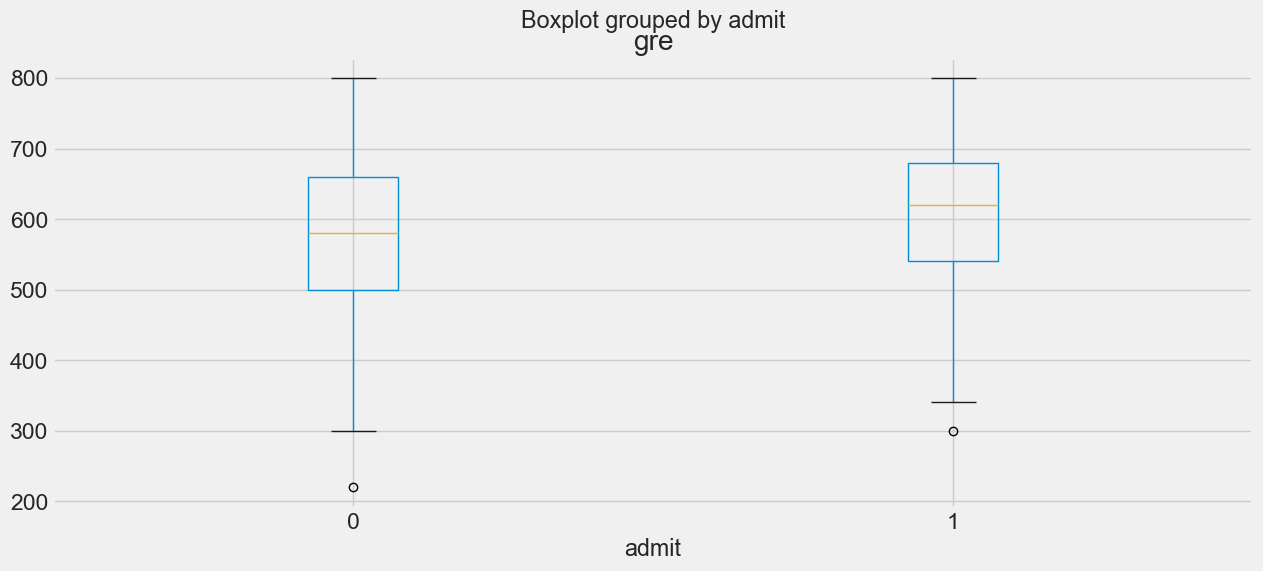

In [343]:
admissions.boxplot(by='admit', column='gre')

<Axes: title={'center': 'gpa'}, xlabel='admit'>

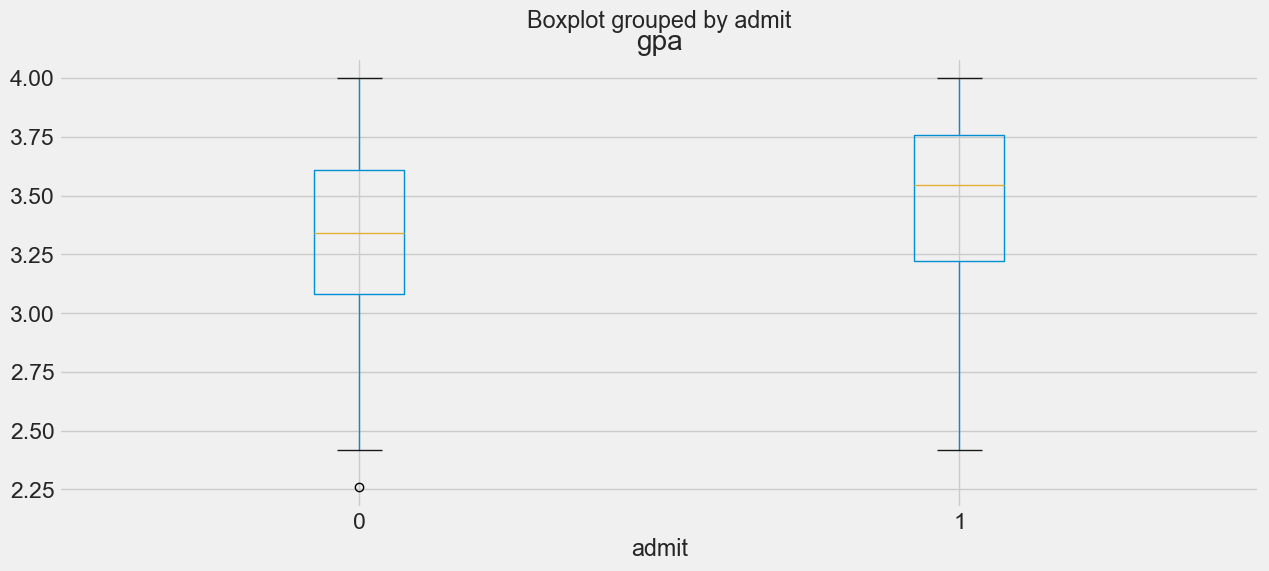

In [344]:
admissions.boxplot(by='admit', column='gpa')

<Axes: title={'center': 'prestige'}, xlabel='admit'>

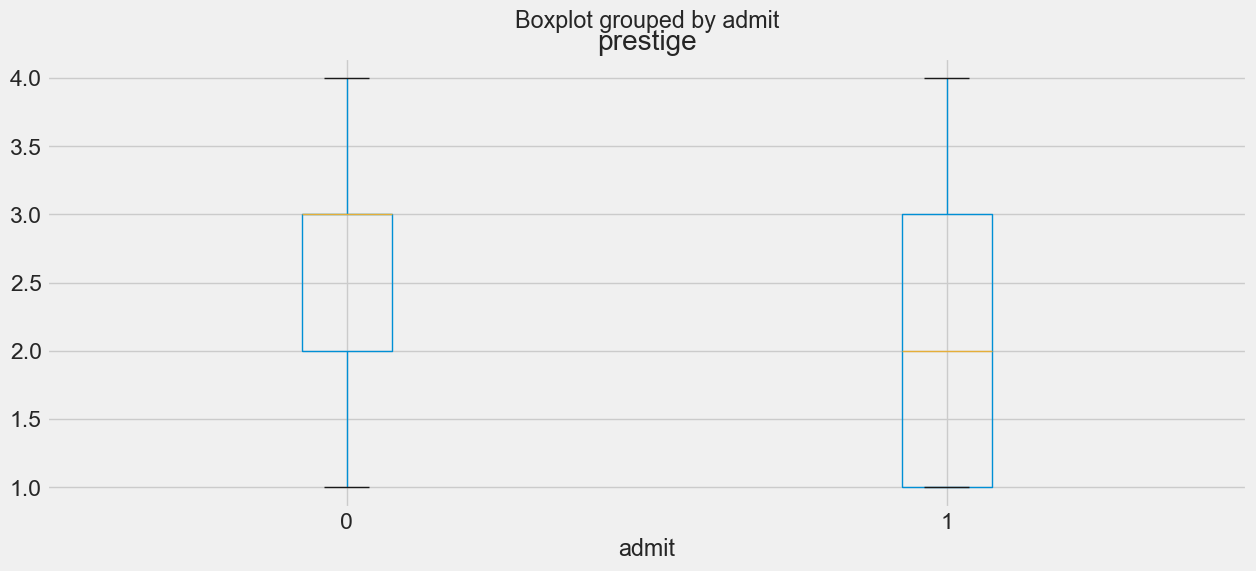

In [345]:
admissions.boxplot(by='admit', column='prestige')

### 3. Create dummy variable for prestige 

In [346]:
admissions = admissions.join(pd.get_dummies(admissions['prestige'], prefix = 'prestige', dtype=int))

In [347]:
admissions

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0,0,1,0
1,1,660.0,3.67,3.0,0,0,1,0
2,1,800.0,4.00,1.0,1,0,0,0
3,1,640.0,3.19,4.0,0,0,0,1
4,0,520.0,2.93,4.0,0,0,0,1
...,...,...,...,...,...,...,...,...
395,0,620.0,4.00,2.0,0,1,0,0
396,0,560.0,3.04,3.0,0,0,1,0
397,0,460.0,2.63,2.0,0,1,0,0
398,0,700.0,3.65,2.0,0,1,0,0


### 4. split and standardize the data

In [348]:
feature_cols = ['gre', 'gpa', 'prestige_1.0', 'prestige_2.0', 'prestige_3.0','prestige_4.0']

X = admissions[feature_cols]
y=admissions['admit']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# # We fit to figure out the distribution
# scaler.fit(X_train)

# # now we transform everything using that
# # if you wanted to do it all in one step ==> X_train = scaler.fit_transform(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

### 5. Gridsearch CV for k=3, f1_macro

In [355]:
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42, solver='lbfgs', max_iter=200)
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf6 = MultinomialNB()
clf7 = GradientBoostingClassifier(random_state=42)

param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [4, 10, 20, None]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__max_depth'] = [4,10,25, None]
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_neighbors'] = list(range(2,50,2))
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__alpha'] = [10**0, 10**1, 10**2]
param6['classifier'] = [clf6]

param7 = {}
param7['classifier__n_estimators'] = list(range(10,250,10))
param7['classifier__max_depth'] = [5, 10, 20, None]
param7['classifier'] = [clf7]


pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4, param5, param6, param7]
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='f1_macro').fit(X_train, y_train)

In [356]:
%%time
# Train the grid search model
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='f1_macro').fit(X_train, y_train)

CPU times: user 215 ms, sys: 29.5 ms, total: 244 ms
Wall time: 5.36 s


In [357]:
results_df = pd.DataFrame(gs.cv_results_)
results_df.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__C,param_classifier__penalty,param_classifier__n_neighbors,param_classifier__alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
30,0.004449,0.000198,0.000932,0.000049,"LogisticRegression(C=100, max_iter=200, random...",NaN,NaN,100,l2,NaN,NaN,"{'classifier': LogisticRegression(C=100, max_i...",0.625624,0.590951,0.539922,0.585499,0.035199,1
157,0.185548,0.028811,0.001607,0.000051,GradientBoostingClassifier(random_state=42),None,240,NaN,NaN,NaN,NaN,{'classifier': GradientBoostingClassifier(rand...,0.573441,0.564042,0.617937,0.585140,0.023506,2
141,0.082402,0.007291,0.001330,0.000022,GradientBoostingClassifier(random_state=42),None,80,NaN,NaN,NaN,NaN,{'classifier': GradientBoostingClassifier(rand...,0.573441,0.564042,0.617937,0.585140,0.023506,2
117,0.076553,0.005656,0.001300,0.000035,GradientBoostingClassifier(random_state=42),20,80,NaN,NaN,NaN,NaN,{'classifier': GradientBoostingClassifier(rand...,0.573441,0.564042,0.617937,0.585140,0.023506,2
32,0.000885,0.000049,0.000876,0.000040,DecisionTreeClassifier(random_state=42),10,NaN,NaN,NaN,NaN,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.587054,0.566993,0.601140,0.585062,0.014011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0.000261,0.000029,0.000000,0.000000,"LogisticRegression(C=100, max_iter=200, random...",NaN,NaN,0.01,l1,NaN,NaN,"{'classifier': LogisticRegression(C=100, max_i...",NaN,NaN,NaN,NaN,NaN,154
23,0.000253,0.000026,0.000000,0.000000,"LogisticRegression(C=100, max_iter=200, random...",NaN,NaN,0.1,l1,NaN,NaN,"{'classifier': LogisticRegression(C=100, max_i...",NaN,NaN,NaN,NaN,NaN,154
25,0.000282,0.000059,0.000000,0.000000,"LogisticRegression(C=100, max_iter=200, random...",NaN,NaN,1,l1,NaN,NaN,"{'classifier': LogisticRegression(C=100, max_i...",NaN,NaN,NaN,NaN,NaN,154
27,0.000268,0.000031,0.000000,0.000000,"LogisticRegression(C=100, max_iter=200, random...",NaN,NaN,10,l1,NaN,NaN,"{'classifier': LogisticRegression(C=100, max_i...",NaN,NaN,NaN,NaN,NaN,154


array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [358]:
gs.best_params_
gs.best_score_

0.5854992321313975

In [359]:
# Test data performance
print("Precision:",precision_score(gs.predict(X_test), y_test))
print("Recall:",recall_score(gs.predict(X_test), y_test))
print("ROC AUC Score:",roc_auc_score(gs.predict(X_test), y_test))

Precision: 0.12
Recall: 0.5
ROC AUC Score: 0.6013513513513513


In [361]:
cls

NameError: name 'cls' is not defined

In [363]:
y_pred=gs.best_estimator_.predict(X_test)

In [364]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.95      0.81        55
           1       0.50      0.12      0.19        25

    accuracy                           0.69        80
   macro avg       0.60      0.53      0.50        80
weighted avg       0.64      0.69      0.61        80

